# Final Project: Build a Regression Model in Keras

The objective of this project is to build a regression model using the Keras library to model data about concrete compressive strength. Based on inputs related to composition (Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate) and time (Age), we will create a model that can predict the concrete's compressive strength.

## Part B: Use normalized data

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

### Download and Clean Dataset

We'll start by importing the <em>pandas</em> and the Numpy libraries.

In [1]:
import pandas as pd
import numpy as np

Then we'll download and read the file.

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


We'll check the dataset for any missing values.

In [3]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

#### Split data into predictors and target
Then we'll separate the inputs from the output. The target variable in this problem is the concrete compressive strength. Our predictors are all the other columns.

In [5]:
X = concrete_data.iloc[:, :-1]  # Predictors
y = concrete_data.iloc[:, -1]   # Target

We'll double check the predictors and the target dataframes.

In [6]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, we'll save the number of predictors to a variable called n_cols so we can use it when building our model.

In [8]:
n_cols = X.shape[1] # number of predictors

### Build a Neural Network
First we'll import Keras and the packages we need to build our regression model.

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

Now, we'll define a function that defines our regression model for us so that we can call it to create our model.

In [10]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

This function creates a model that has one hidden layer of 10 nodes that uses a ReLU activation function. The it uses the adam optimizer and the mean squared error as the loss function.

### Train and Test the Network

#### Instructions for Part B
Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

First, we'll import what we'll need from Scikit-learn.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


Then, we'll create a list of mean squared errors where we can save the values of the mean squared errors after each loop run so that we can calculate the mean and standard deviation of these.

In [12]:
mse_list = []

Now, we'll create a loop that allows us to cycle through this process 50 times. We will leave out 30% of the data for validation and we will train the model for 50 epochs. 

In [13]:
for i in range(50): #cycle through 5 times
    # Split data into trainng and testing data. Use a fixed random state to ensure reproducibility.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Normalize the data
    X_train_normalized = (X_train - X_train.mean()) / X_train.std()
    X_test_normalized = (X_test - X_test.mean()) / X_test.std()
    
    # Print so humans can track which cycle the loop is on. Added 1 because most humans don't count starting at 0.
    print(f"Cycle:{i + 1}")
    
    # Call model
    model = regression_model()
    
    # Fit the model
    model.fit(X_train_normalized, y_train, validation_data=(X_test_normalized, y_test), epochs=50, verbose=2)
    
    # Evaluate model
    y_pred = model.predict(X_test_normalized)
    
    # Save mean-square error to list
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    
    

#share mean squared error and standard deviation
mean_mse = np.mean(mse_list)
std_mse = np.std(mse_list)

Cycle:1






Train on 721 samples, validate on 309 samples
Epoch 1/50


2024-08-12 17:42:13.905284: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2024-08-12 17:42:13.914100: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394300000 Hz
2024-08-12 17:42:13.914706: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55adfbf03340 executing computations on platform Host. Devices:
2024-08-12 17:42:13.914755: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2024-08-12 17:42:13.995929: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

 - 0s - loss: 1642.7560 - val_loss: 1539.6109
Epoch 2/50
 - 0s - loss: 1626.4953 - val_loss: 1524.9774
Epoch 3/50
 - 0s - loss: 1611.0120 - val_loss: 1511.0986
Epoch 4/50
 - 0s - loss: 1596.4241 - val_loss: 1497.8120
Epoch 5/50
 - 0s - loss: 1582.2931 - val_loss: 1484.9176
Epoch 6/50
 - 0s - loss: 1568.4794 - val_loss: 1472.2188
Epoch 7/50
 - 0s - loss: 1554.5406 - val_loss: 1459.4644
Epoch 8/50
 - 0s - loss: 1540.3687 - val_loss: 1446.0311
Epoch 9/50
 - 0s - loss: 1525.6416 - val_loss: 1431.8488
Epoch 10/50
 - 0s - loss: 1510.1232 - val_loss: 1417.2362
Epoch 11/50
 - 0s - loss: 1493.9575 - val_loss: 1402.0437
Epoch 12/50
 - 0s - loss: 1476.9720 - val_loss: 1385.5931
Epoch 13/50
 - 0s - loss: 1458.9837 - val_loss: 1368.4338
Epoch 14/50
 - 0s - loss: 1440.3144 - val_loss: 1350.1169
Epoch 15/50
 - 0s - loss: 1420.3141 - val_loss: 1331.5430
Epoch 16/50
 - 0s - loss: 1400.0454 - val_loss: 1311.2379
Epoch 17/50
 - 0s - loss: 1378.1963 - val_loss: 1290.7911
Epoch 18/50
 - 0s - loss: 1355.980

Finally, we'll print the list of mean squared errors and then, print the mean and standard deviations of these mean squared errors.

In [14]:
print(f"There are {len(mse_list)} mean squared errors: {mse_list}")
print(f"The mean of these mean squared errors is {np.around(mean_mse, decimals = 4)}")
print(f"The standard deviation of these mean squared errors is {np.around(std_mse, decimals = 4)}")

There are 50 mean squared errors: [487.3039241358973, 297.5604218931229, 382.2469022635648, 349.1804127152577, 282.9598094377401, 229.80274990506416, 307.1375264275135, 242.42312049540757, 270.96007261478707, 535.4480124842917, 487.1762095717764, 345.0528815895832, 345.5695280307339, 322.08495281690296, 244.55760919667222, 522.1513320169709, 440.71290742916347, 496.13880640656794, 485.2500437748912, 259.65668026894485, 297.3366808729172, 491.2887382116635, 242.0832028109857, 267.6637427679312, 555.7625339041955, 222.6145769932165, 281.7490155214701, 365.11872069529113, 496.1146829758953, 339.075030411745, 257.0136514738303, 258.8398555937066, 373.12269552052857, 346.11583643731643, 300.3515315808184, 257.78208923659093, 232.5153678638359, 665.486528347893, 269.264511561687, 323.46994211624076, 401.21278943855407, 255.24546839479507, 258.054397104986, 491.3417040568809, 274.6206434526834, 268.19431281753174, 355.5541251415713, 356.01360857882764, 326.7310718341226, 264.9858135024232]
Th

We'll plot the mean square errors to better visualize the output.

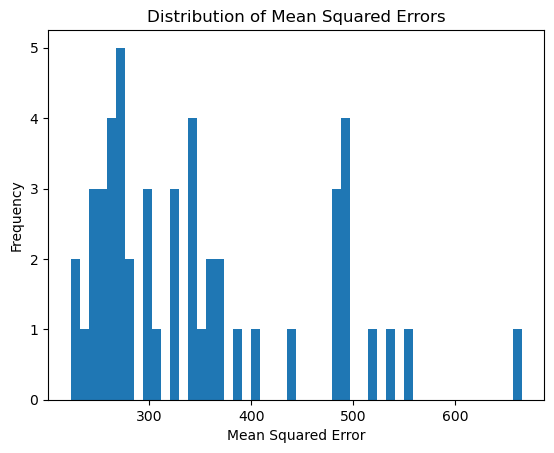

In [15]:
import matplotlib.pyplot as plt

# Plot distribution of mean squared errors
plt.hist(mse_list, bins=50)
plt.xlabel("Mean Squared Error")
plt.ylabel("Frequency")
plt.title("Distribution of Mean Squared Errors")
plt.show()

### Conclusions

The individual mean squared error values as well as the mean of these mean squared values are lower compared to before, which suggests that the model is better at predicting the concrete strength after we normalized the data.

The standard deviation is also lower, showing that the model's output is less variable across training iterations.

Overall, unsurprisingly, we can see that normalizing the data improves the model's performance and reduces the variability.

However, it's worth noting that the mean squared error values are still fairly high, so there's still work to do to improve in the model's performance.